数字0对应的图片是:


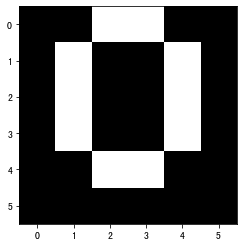

数字8对应的图片是:


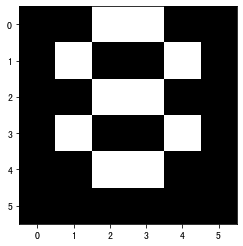

--------------------
对每张图片进行识别
图像[0]得分类结果是:[0],它得特征是[[12.48528137  5.          2.82842712  2.          2.82842712  5.        ]]
图像[1]得分类结果是:[1],它得特征是[[5.41421356 6.         1.41421356 0.         2.82842712 4.        ]]
图像[2]得分类结果是:[2],它得特征是[[11.65685425  4.          1.41421356  2.          4.24264069  4.        ]]
图像[3]得分类结果是:[3],它得特征是[[6.24264069 5.         1.41421356 0.         0.         7.        ]]
图像[4]得分类结果是:[4],它得特征是[[7.82842712 3.         1.41421356 1.         4.24264069 3.        ]]
图像[5]得分类结果是:[5],它得特征是[[8.24264069 5.         1.41421356 0.         0.         7.        ]]
图像[6]得分类结果是:[6],它得特征是[[8.65685425 6.         1.41421356 1.         1.41421356 6.        ]]
图像[7]得分类结果是:[7],它得特征是[[9.82842712 5.         0.         1.         0.         5.        ]]
图像[8]得分类结果是:[8],它得特征是[[7.65685425 7.         1.41421356 0.         1.41421356 7.        ]]
图像[9]得分类结果是:[9],它得特征是[[8.24264069 8.         0.         0.         1.41421356 6.        ]]


In [1]:
import numpy as np
from scipy import signal
import torch
import matplotlib.pyplot as plt

def generate_data():
    # 本函数生成0-9，10个数字的图片矩阵
    image_data=[]
    num_0 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,1,0,0,1,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_0)
    num_1 = torch.tensor(
    [[0,0,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0],
    [0,0,1,1,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_1)
    num_2 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,0,1,0,0],
    [0,0,1,0,0,0],
    [0,1,1,1,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_2)
    num_3 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,0,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_3)
    num_4 = torch.tensor(
    [
    [0,0,0,0,1,0],
    [0,0,0,1,1,0],
    [0,0,1,0,1,0],
    [0,1,1,1,1,1],
    [0,0,0,0,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_4)
    num_5 = torch.tensor(
    [
    [0,1,1,1,0,0],
    [0,1,0,0,0,0],
    [0,1,1,1,0,0],
    [0,0,0,0,1,0],
    [0,1,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_5)
    num_6 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,0,0],
    [0,1,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_6)
    num_7 = torch.tensor(
    [
    [0,1,1,1,1,0],
    [0,0,0,0,1,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_7)
    num_8 = torch.tensor(
    [[0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,1,0,0,1,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0]])
    image_data.append(num_8)
    num_9 = torch.tensor(
    [[0,0,1,1,1,0],
    [0,1,0,0,1,0],
    [0,0,1,1,1,0],
    [0,1,0,0,1,0],
    [0,0,0,0,1,0],
    [0,0,0,0,0,0]])
    image_data.append(num_9)
    return image_data

def get_feature(x):
    # 下面添加提取图像x的特征feature的代码
    def s_x(img):  #dx
        kernel = np.array([[-1, 0, 1]])
        imgx = signal.convolve2d(img, kernel, boundary='symm', mode='same')
        return imgx

    def s_y(img):  #dy
        kernel = np.array([[-1, 0, 1]]).T
        imgy = signal.convolve2d(img, kernel, boundary='symm', mode='same')
        return imgy

    def grad(img):  
        imgx = s_x(img)
        imgy = s_y(img)
        s = np.sqrt(imgx ** 2 + imgy ** 2)
        theta = np.arctan2(imgx,imgy)
        theta = np.degrees(theta)
        theta[theta < 0] = np.pi + theta[theta < 0]
        return (s, theta)
    
    def cell_gradient(cell_magnitude, cell_angle): 
        orientation_centers = [0] * bin_size  
        for k in range(cell_magnitude.shape[0]): 
            for l in range(cell_magnitude.shape[1]):
                gradient_strength = cell_magnitude[k][l] 
                gradient_angle = cell_angle[k][l]  
                angle = int(gradient_angle / angle_unit)
                orientation_centers[angle] = orientation_centers[angle]+ gradient_strength
        return orientation_centers

    height, width = x.shape
    gradient_magnitude,gradient_angle = grad(x)

    cell_size = 6 # cell 6*6
    bin_size = 6  
    angle_unit = 360 / bin_size 
    gradient_magnitude = abs(gradient_magnitude) 
    cell_gradient_vector = np.zeros((int(height / cell_size), int(width / cell_size), bin_size))

    cell_magnitude = gradient_magnitude[0 * cell_size:(1) * cell_size,0 * cell_size:(1) * cell_size]
    cell_angle = gradient_angle[0 * cell_size:(1) * cell_size,0* cell_size:(1) * cell_size]
    cell_gradient_vector[0][0] = cell_gradient(cell_magnitude, cell_angle) 
    feature = cell_gradient_vector[0][0]  
    return feature

def model(feature, image_data):
    # 下面添加对feature进行决策的代码，判定出feature 属于[0,1,2,3,...9]哪个类别
    y = -1
    image=[]
    min_dist = 10000
    for i in range(10):
        image.append(np.array(get_feature(image_data[i])))
        if min_dist > abs(image[i]-feature).sum():
            min_dist = abs(image[i]-feature).sum()
            y = i
    return y


if __name__ == "__main__":

    image_data = generate_data()
    # 打印出0的图像
    print("数字0对应的图片是:")
    plt.imshow(image_data[0],cmap='gray')
    plt.show()

    # 打印出8的图像
    print("数字8对应的图片是:")
    plt.imshow(image_data[8],cmap='gray')
    plt.show()
    print("-" * 20)

    # 对每张图片进行识别
    print("对每张图片进行识别")
    for i in range(0, 10):
        x = image_data[i]
        # 对当前图片提取特征
        feature = get_feature(x)
        # 对提取到得特征进行分类
        y = model(feature, image_data)
        # 打印出分类结果
        print("图像[%s]得分类结果是:[%s],它得特征是[%s]" % (i, y, feature))